# Group Epidemiology Project Overview
Epidemiological models are increasingly used during infectious disease outbreaks to make outbreak projections and to guide control interventions. This project involves developing simple computational models of outbreaks and using them to predict the effects of different interventions. It also involves using stochastic epidemiological models (models that include randomness) to predict the risk that early cases at the beginning of an outbreak lead on to a major epidemic (with a large number of cases) as opposed to fade out as a minor outbreak (with a small number of cases)

# Task A1: Baseline Case – Deterministic SIR Model

We solve the **deterministic SIR model** numerically using Python. The population is divided into:  

- **S (Susceptible)** – can catch the disease  
- **I (Infected)** – currently infected  
- **R (Recovered)** – immune  

We start with 3 infected individuals and the rest susceptible.

---

## Solving the Model

The system of differential equations is solved using `odeint`:

- `dS/dt = -β * S * I / N`  
- `dI/dt = β * S * I / N - γ * I`  
- `dR/dt = γ * I`  

This gives **S(t), I(t), and R(t)** over time.

---


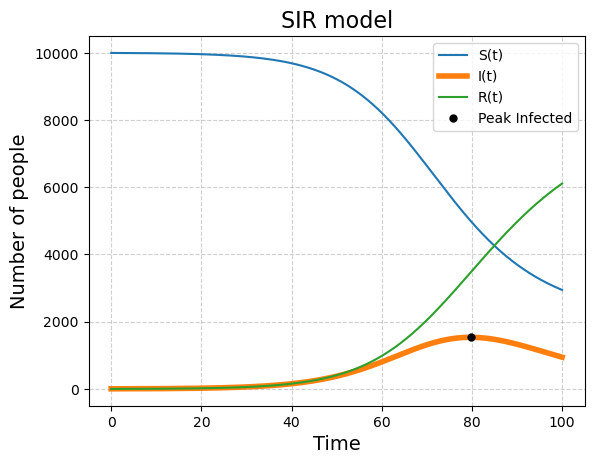

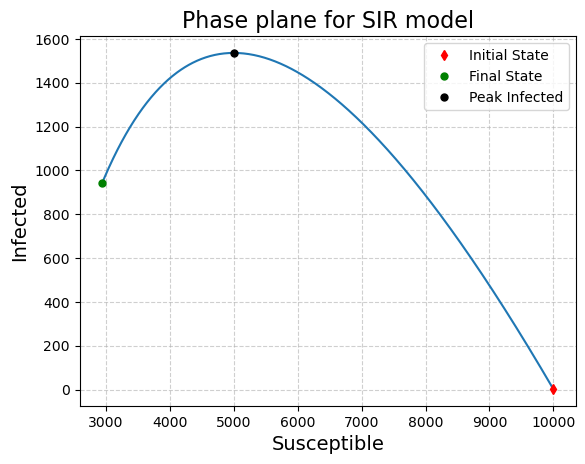

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 2945
I(t=tf) = 944
R(t=tf) = 6111
The maximum number of infected = 1535


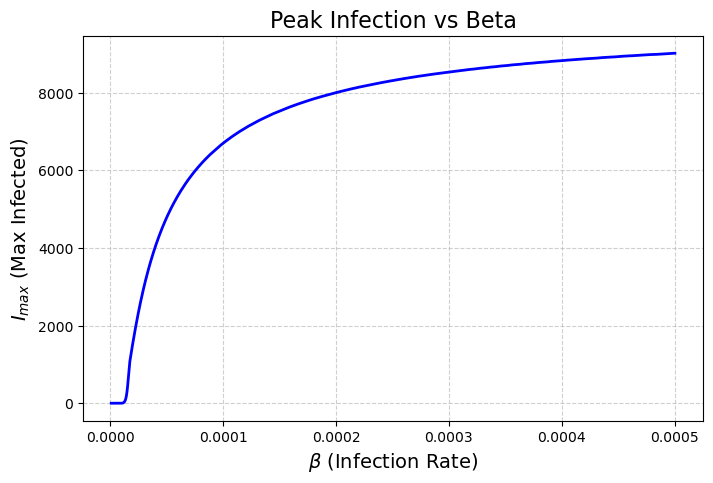

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from scipy.optimize import fsolve

def SIR(y, t, beta):
    # returns RHS of the SIR model
    S, I, R = y
    mu = 0.1
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    return Sdot, Idot, Rdot

N = 10**4  # Total population (10,000)
S0 = N - 3  # Initial susceptible individuals
I0 = 3      # Initial infected individuals
R0 = 0      # Initial recovered individuals
y0 = [S0, I0, R0]  # Initial condition array

# set up time grid for the solution
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

beta = 2e-5 #value of beta in the baseline case
beta_values= np.linspace(1*(10**-6),5*(10**-4),1000) #1000 values for beta equally spaced between 1x10^-6 and 5x10^-4
I_max_values = []  # Will store max infected for each beta in beta_values

# Call the ODE solver and extract solutions
y_sol = odeint(SIR, y0, t,args=(beta,))
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# find max value and time of max I and corresponding S value
I_max = max(I)
I_max_index= np.argmax(I)
t_max= t[I_max_index]
S_corresponding= S[I_max_index]

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S(t)")
plt.plot(t, I, lw = 4, label = "I(t)")
plt.plot(t, R, label = "R(t)")
plt.plot(t_max, I_max, 'ko', markersize=5, label="Peak Infected")
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Number of people", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 10)
plt.grid(True, linestyle="--", alpha=0.6) 
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
plt.xlabel("Susceptible", fontsize = 14)
plt.ylabel("Infected", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial and final states and peak infected
plt.plot(S[0], I[0], 'rd', markersize = 5,label="Initial State")
plt.plot(S[-1], I[-1], 'go', markersize = 5,label="Final State")
plt.plot(S_corresponding, I_max, 'ko', markersize=5, label="Peak Infected")
plt.grid(True, linestyle="--", alpha=0.6) 
plt.legend(fontsize = 10)
plt.show()

#Print the final values of S, I, R and peak value of I
print("At the end of the simulation, the final values of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum number of infected =", int(I_max))

#iterate through the beta values and find max I for each
for beta in beta_values:
    y_sol = odeint(SIR, y0, t, args=(beta,))
    I = y_sol[:, 1]  
    I_max = int(max(I)) 
    I_max_values.append(I_max)  

#Plot Maximum I vs Beta
plt.figure(figsize=(8, 5))
plt.plot(beta_values, I_max_values, 'b-', linewidth=2)
plt.xlabel(r'$\beta$ (Infection Rate)', fontsize=14)
plt.ylabel(r'$I_{max}$ (Max Infected)', fontsize=14)
plt.title('Peak Infection vs Beta', fontsize=16)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Plots

- **Time-series plot:** shows S, I, and R over time; the peak of I is marked with a black circle and printed as an integer.  
- **Phase-plane plot (S vs I):** shows the outbreak trajectory; the peak of I is highlighted.  

---

## Varying Infection Rate (β)

We repeat the simulation for multiple β values to see how infection rate affects the peak of I.  


# Task A2: Effect of Vaccination

We study how **vaccination reduces outbreak size** in the SIR model.  

- Start with 5 infected individuals; vaccinated people are removed from the susceptible population at the start.  
- Solve the SIR model numerically for different numbers of vaccinated individuals using a `for` loop.  
- Plot the **total infected or recovered after 500 days** versus the number vaccinated.  
- Compare results with the **final size equation**, adjusting \(S_0\) for vaccination:  

- Markers on the plot indicate strictly positive solutions for selected vaccination levels.  

This shows how increasing vaccination lowers the outbreak peak and final size.


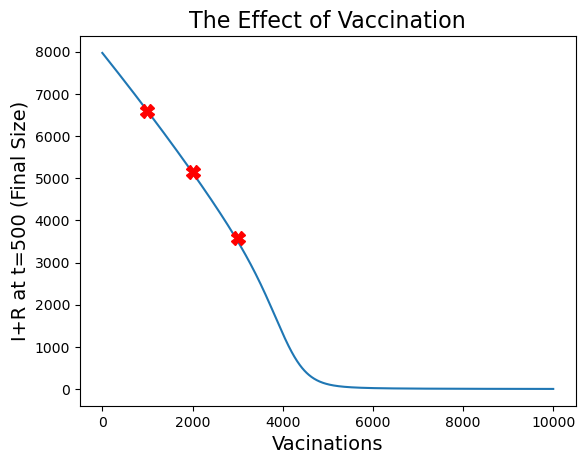

In [4]:
# Definition of the SIR system of Equations with a specified beta
def SIR(y, t):
    
    S, I, R, V = y

    beta = 2*(10**-5)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    Vdot = 0 # Vdot = 0 as the number of vaccinated individuals does not change

    # Return the RHS of the differential equations
    return Sdot, Idot, Rdot, Vdot

# Problem setup

# Set up time grid for the solution to the SIR model
tf = 500
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# Set up the vacination grid for the vaccination plot
vf = 10**4
v = np.linspace(0, vf, Nsteps+1)
I_and_R_total = []

# Solve the system for each number of vaccinated individuals and find the final size (total number of infections at the end of the epidemic)
for i in v:

    # Set initial conditions and put into array y0
    S0 = 10**4 - 5 - i
    I0 = 5
    R0 = 0
    V0 = i
    y0 = np.array([S0, I0, R0, V0])

    # Solve the system numerically
      
    y_sol = odeint(SIR, y0, t)
    
    # Extract S, I, R and V from the solution array y
    S = y_sol[:,0]
    I = y_sol[:,1]
    R = y_sol[:,2]
    V = y_sol[:,3]

    # Append the total number of infections at t = 500 (the final size) to the list
    I_and_R_total.append(I[500]+R[500])

# Final size equation

def FinalSize(x,V,N,beta,mu):

    # The final size equation has been rearranged such that the LHS is 0
    # Vaccinating V people has the effect of reducing the size of the succeptable population by V, so N has been replaced by N-V
    return (N-V)-(N-V)*np.exp(-(beta/mu)*x)-x
    

V_values = [1000,2000,3000]
final_sizes = []

# Solve the final size equation for 1000, 2000 and 3000 vaccinations
for i in V_values:

    V0 = i
    N = 10**4
    beta = 2*(10**-5)
    mu = 0.1
    guess = N
    # Finds a root of the rearanged final size equation using the Powell's hybrid Algorithm (a modification of the Newton-Raphson Method)
    # The initial guess is N which is large enough to give the correct solution
    x = fsolve(FinalSize,guess,args=(V0,N,beta,mu))
    final_sizes.append(x)

# Plot the results

# Plot the final size against number of vaccinations
plt.plot(v, I_and_R_total)
plt.xlabel("Vacinations", fontsize = 14)
plt.ylabel("I+R at t=500 (Final Size)", fontsize = 14)
plt.title("The Effect of Vaccination", fontsize = 16)

# Plot markers for the numerical solutions to the final size equation for 1000, 2000 and 3000 vaccinations
for i in range(3):
    plt.plot(V_values[i], final_sizes[i], marker='X', markersize=10, color='red', markerfacecolor='red')
plt.show()

# Task A3: Effect of Social Distancing

We study how **social distancing affects the outbreak** by varying the infection rate parameter, $\beta(t)$:

$$
\beta(t) =
\begin{cases} 
2 \times 10^{-7}, & t < T \\
1.5 \times 10^{-7}, & T \le t \le T + 30 \\
2 \times 10^{-7}, & t > T + 30
\end{cases}
$$

- Start with 5 infected individuals: $(S,I,R) = (N-5, 5, 0)$, with $N = 10^6$ and recovery rate $\mu = 0.1$.  
- Run the SIR model for a **fixed $T = 30$ days** and plot the time-series of $S(t)$, $I(t)$, and $R(t)$.  
- Then, allow $T$ to vary from 1 to 200 days and use a `for` loop to find the value of $T$ that **minimises the peak of $I$** (i.e., flattens the curve).  
- Plot the **maximum $I$ as a function of $T$** and print the optimal $T$.  

This task shows how **timing of interventions** can reduce the peak number of infections and help "flatten the curve".


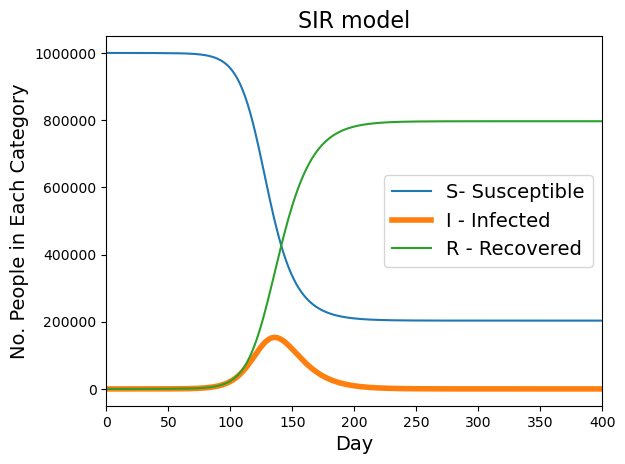

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from scipy.optimize import fsolve


# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y
    T = 30
    if t < T:
        beta = 2*(10**(-7))
    elif T <= t and t <= (T + 30):
        beta = 1.5*(10**(-7))
    else:
        beta = 2*(10**(-7))
    
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

# --- Problem setup --- #

# set up time grid for the solution
tf = 1000
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)
N = 10**6
# Set initial conditions and put into array y0
S0 = N - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S- Susceptible")
plt.plot(t, I, lw = 4, label = "I - Infected")
plt.plot(t, R, label = "R - Recovered")

# labels etc
plt.xlabel("Day", fontsize = 14)
plt.ylabel("No. People in Each Category", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.xlim([0,400])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()   

The value of T that minimises the maximum value of infected people and therefore flattens the curve the most is 99


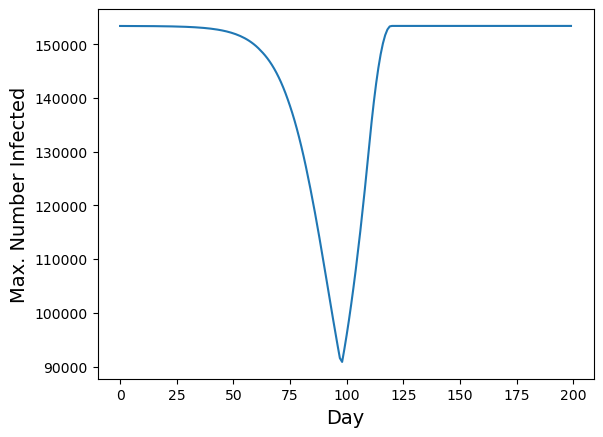

In [3]:
Imaxarray = np.array([]) #Creates array for maximum values of I
for T in range (1,201):
    def fI(y, t):  #Creates another function for I
        
        S, I, R = y
        if t < T:
            beta = 2*(10**(-7))
        elif T <= t and t <= (T + 30):
            beta = 1.5*(10**(-7))
        else:
            beta = 2*(10**(-7))
        
        mu = 0.1
        
        N = S + I + R
        Sdot = -beta * S * I
        Idot = beta * S * I - mu * I
        Rdot = mu * I
        
        return Sdot, Idot, Rdot
    # set up time grid for the solution
    tf1 = 1000     
    Nsteps1 = 1000
    t1 = np.linspace(0, tf1, Nsteps1+1)
    N1 = 10**6
    # Set initial conditions and put into array y01
    S01 = N1 - 5
    I01 = 5
    R01 = 0
    y01 = np.array([S01, I01, R01])
    
    y_sol1 = odeint(fI, y01, t1)
    
    # extract I1 from solution array y_sol1
    I1 = y_sol1[:,1]
    R1 = y_sol1[:,2]
    Imax = np.max(I1)           #Finds maximum value of I at each value of T
    Imaxarray = np.append(Imaxarray, Imax)  #Creates an array of maximum I values

Tmin = (np.argmin(Imaxarray) + 1)   #Finds index/value of T at the minimum value of Imax
print ('The value of T that minimises the maximum value of infected people and therefore flattens the curve the most is',Tmin)

#Plotting graph for Imax against T
plt.plot(Imaxarray)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Max. Number Infected", fontsize = 14)
plt.show;

# Task A4: Comparison Between Stochastic and Deterministic SIR Models

This task compares the **stochastic SIR model** to the **deterministic SIR model**.  

- We run **100 simulations** of the stochastic model with:  
  - $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^3$  
  - Initial infections: 10 individuals  
- Each simulation tracks $I(t)$ at predefined times ($t = 0, 0.5, 1, 1.5, ..., 100$).  
  - A vector of length 201 is used to store $I(t)$ for each time point.  
  - Values are updated after each event, filling all intermediate time points between events.  
- The **mean $I(t)$** across all 100 simulations is computed and plotted.  
- On the same plot, we overlay the **deterministic SIR solution** (from Task A1) for comparison.  

**Purpose:**  
- Compare the dynamics of stochastic and deterministic models.  
- Estimate the probability of a major outbreak when a small number of infected individuals enter a fully susceptible population.  
- Demonstrate the variability and randomness inherent in real outbreaks compared to the smooth deterministic model.


In [ ]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt

# --- Problem setup --- #

# Parameter values
beta = 3.0*10**-4                                     
mu = 0.1

# Set up arrays to record event times, and values of S, I and R after after each event
SVec = np.array([])
IVec = np.array([])
RVec = np.array([])
tVec = np.array([])

# Set up an array to record pre-determined times and values of I at those times
tVals = np.array([i*0.5 for i in range(201)])
IVals = np.array([0 for i in range(201)])

# Set initial conditions and the initial time
S = 10**3 - 10                                       
I = 10
R = 0
t = 0

IVals[0] = I

# Record initial conditions in the S, I, R and t arrays
SVec = np.append(SVec, S)
IVec = np.append(IVec, I)
RVec = np.append(RVec, R)
tVec = np.append(tVec, t)

# --- While the outbreak is ongoing (I > 0), generate events --- #
  
while I > 0:
    
    previous_time = t
    
    r1 = np.random.uniform(0, 1, 1)    
    totalRate = beta*I*S + mu*I
    t = t - (1/totalRate)*np.log(r1)
    
    new_time = t
    
    for i in range(201):
        if tVals[i] < new_time and IVals[i]==0:       
            IVals[i] = I
    
    r2 = np.random.uniform(0, 1, 1)
    if r2 < beta*I*S/totalRate:                       
        S = S - 1
        I = I + 1
    else:
        I = I - 1
        R = R + 1
        
    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(tVec, SVec, label = "S")
plt.plot(tVec, IVec, lw = 2, label = "I")
plt.plot(tVec, RVec, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("Stochastic SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the time evolution of I, as recorded in I_vals
plt.plot(tVals, IVals, lw = 2, label = "IVals")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Stochastic SIR model - extracted I values", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()



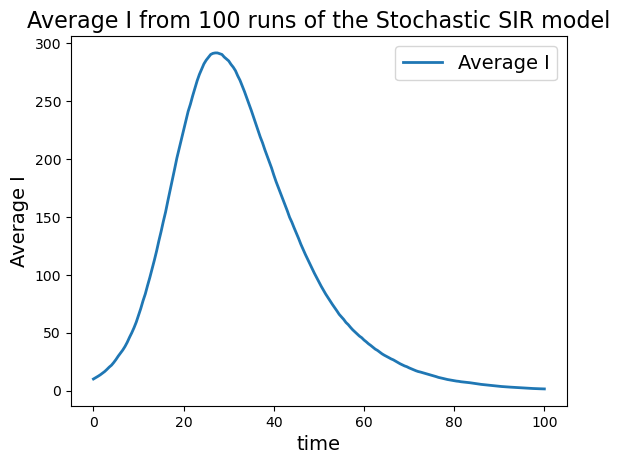

In [6]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt

#Parameter values

beta = 3.0 * 10**-4
mu = 0.1

#set up vectors to for S,R,I,t

SVec = np.array([])
IVec = np.array([])
RVec = np.array([])
tVec = np.array([])

#settinig tVals as interval steps from 0 to 100 increasing by 0.5 each time

tVals = np.array([i * 0.5 for i in range(201)])
average_IVals = np.zeros(201)

num_runs = 100

# Set initial conditions and the initial time

for _ in range(num_runs):
    S = 10**3 - 10
    I = 10
    R = 0
    t = 0

    I_run = np.zeros(201)
    I_run[0] = I

# --- While the outbreak is ongoing (I > 0), generate events --- #
    
    while I > 0:
        previous_time = t

        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta * I * S + mu * I
        t = t - (1 / totalRate) * np.log(r1)

        new_time = t

        for i in range(201):
            if tVals[i] < new_time and I_run[i] == 0:  
                I_run[i] = I

        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta * I * S / totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1

    average_IVals += I_run

#finding average IVals

average_IVals /= num_runs

#plotting the average 

plt.plot(tVals, average_IVals, lw=2, label="Average I")

plt.xlabel("time", fontsize=14)
plt.ylabel("Average I", fontsize=14)
plt.title("Average I from 100 runs of the Stochastic SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()

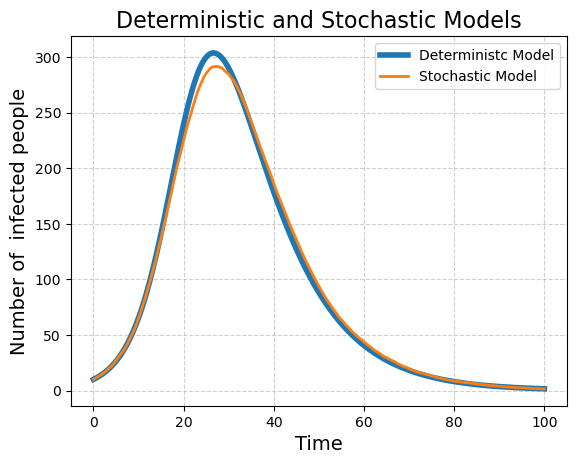

In [7]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

mu= 0.1
beta =  3.0 * 10**-4

N = 10**3  # Total population (1,000)
S0 = N - 10  # Initial susceptible individuals
I0 = 10   # Initial infected individuals
R0 = 0      # Initial recovered individuals
y0 = [S0, I0, R0]  # Initial condition array

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y
    mu = 0.1
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    return Sdot, Idot, Rdot

# set up time grid for the solution
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# Call the ODE solver and extract solutions
y_sol = odeint(SIR, y0, t)
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# plot the time evolution of the I
plt.plot(t, I, lw = 4, label = "Deterministc Model")
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Number of  infected people", fontsize = 14)
plt.title("Deterministic and Stochastic Models", fontsize = 16)
plt.legend(fontsize = 10)
plt.grid(True, linestyle="--", alpha=0.6) 
plt.plot(tVals, average_IVals, lw=2, label="Stochastic Model")
plt.legend(fontsize = 10)
plt.show()

# Task A5: Probability of a Major Outbreak

We now estimate the **probability of a major outbreak** using the stochastic SIR model.  

- Run **1000 simulations** with parameters:  
  - $\beta$, $\mu$, $N$ as in the baseline case  
  - Initial condition: 1 infected, rest susceptible  
- For each simulation, record the final outbreak size.  
  - Count how many simulations end with more than 10 infected individuals in total.  
  - The proportion of such cases estimates the probability of a major outbreak.  

---

### Analytic Estimate
From lecture notes, the analytic estimate is:

$$
P(\text{major outbreak}) = 1 - \frac{1}{R_0}, 
\quad \text{where } R_0 = \frac{\beta N}{\mu}.
$$


In [8]:
import matplotlib.pyplot as plt
import numpy as np

L = np.array([])  ## creates an empty array which will be used to store values of R at the end of the each simulation

beta = 3.0*10**-4  ## parameters 
mu = 0.1

n = 1000  ## number of simulations

R0 = beta * 10**3/mu
p = 1 - 1/R0  ## analytic estimate of the probability of major outbreak


for i in range(n):  ## runs 1000 simulations 
    S = 10**3 -  1  ## SIR and t values are reset after each simulation
    I = 1
    R = 0
    t = 0
    RVec = np.array([])
    while I > 0:  ## runs the simulation
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
    
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
        RVec = np.append(RVec, R)
        if I == 0:  ## once simulation has finished (no more people infected) the end values of R are stored
            L=np.append(L,RVec[-1])

def func(m):  ## creates a function of m, which returns the probability that the final I+R value exceeds m for a simulation
    x = 0
    for k in range (n):
        if L[k]>m:
            x = x+1
        prob = x/n
    return prob

print("The proportion of simulations in which  major outbreak occurs is",func(10))
print("The analytical estimate for the probability of major outbreak is",p)

The proportion of simulations in which  major outbreak occurs is 0.662
The analytical estimate for the probability of major outbreak is 0.6666666666666667


# Extensions

This section explores ways to extend the analysis of epidemic models beyond the basic SIR framework.  

- **Total infections in the stochastic SIR model**  
  We consider the variable $M$, the total number ever infected ($I+R$ at the end of the outbreak).  
  By running many simulations, we can estimate the probability $\Pr(M > m)$ and visualise how likely large outbreaks are.  
  A vertical marker highlights the prediction from the final size equation, linking simulations to the analytic theory.  

- **The stochastic SIS model**  
  In this variation, recovered individuals return to the susceptible pool rather than being removed permanently.  
  We use this model to reproduce results from Thompson, Gilligan & Cunniffe (2020), focusing on either outbreak duration as a measure of severity.  
  This comparison shows how disease dynamics change when immunity is temporary.  

- **Extensions of the SIR framework**  
  Real diseases often need more detailed models.  
  Examples include:  
  - **SEIR models** for pathogens with incubation periods (e.g. measles, COVID-19).  
  - **Age-structured models** to capture different transmission patterns across age groups (e.g. influenza).  
  - **Spatial or network-based models** to account for geography or heterogeneous contact patterns (e.g. rabies, HIV).  
  These extensions show how the simple SIR model can be adapted for more realistic scenarios.  


The final size solution is 940.4797907073929


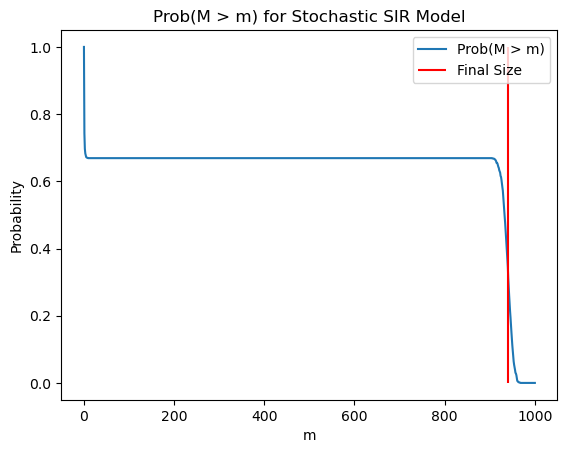

In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# --- Problem setup --- #

# Parameter values
beta = 3.0*10**-4
mu = 0.1
R0 = beta * 10**3/mu
p = 1 - 1/R0
N = 1000
num_of_sims = 1000

L = np.array([])

# Run 1000 simulations
for i in range(num_of_sims):

    #Initalise variables
    S = N -  1
    I = 1
    R = 0
    t = 0

    #Loop while there are still infected individuals (epidemic has not ended)
    while I > 0:
        
        totalRate = beta*I*S + mu*I
        if totalRate == 0:
            break
            
        r1 = np.random.uniform(0, 1, 1)    
        t = t - (1/totalRate)*np.log(r1)
        r2 = np.random.uniform(0, 1, 1)
        
        if r2 < beta*I*S/totalRate:
            # Individual is infected
            S = S - 1
            I = I + 1
        else:
            #Individual recovers
            I = I - 1
            R = R + 1

    #Add a the number of infected individuals to the Array
    L=np.append(L,I+R)

# Calculate the probatility function

def func(m):
    x = 0
    for k in range (num_of_sims):
        if L[k]>m:
            x = x+1
        prob = x/num_of_sims
    return prob

xi = np.linspace(0,N,1001)
s = np.vectorize(func)
m = s(xi)

# Solving the final size equation

def FinalSize(x,N,beta,mu):

    # The final size equation has been rearranged such that the LHS is 0
    return N-N*np.exp(-(beta/mu)*x)-x

guess = N
# Finds a root of the rearanged final size equation using the Powell's hybrid Algorithm (a modification of the Newton-Raphson Method)
# The initial guess is N which is large enough to give the correct solution
finalSizeSolution = fsolve(FinalSize,guess,args=(N,beta,mu))[0]
print("The final size solution is",finalSizeSolution)

plt.plot(xi,m, label = 'Prob(M > m)')
plt.vlines(x = finalSizeSolution, ymin = 0, ymax = 1, colors = 'red', label = 'Final Size')
plt.xlabel('m')
plt.ylabel('Probability')
plt.title('Prob(M > m) for Stochastic SIR Model')
plt.legend()
plt.show()


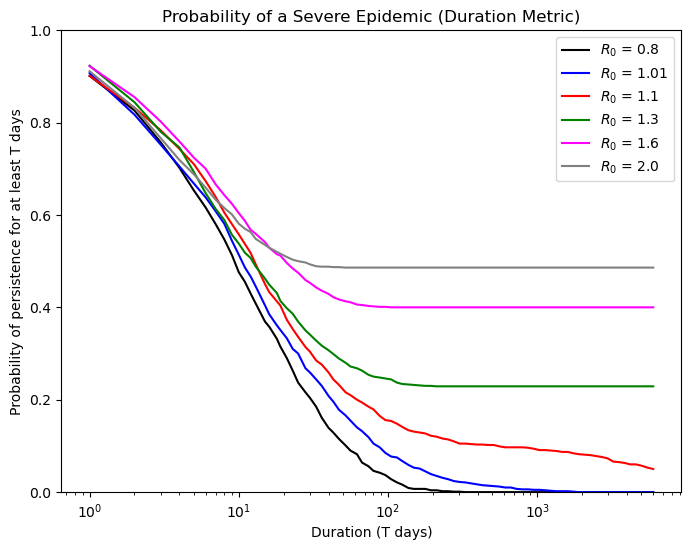

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Population size
mu = 0.1  # Recovery rate (1/mu = 10 days)
R0_values = [0.8, 1.01, 1.1, 1.3, 1.6, 2.0]  # Basic reproduction numbers
num_simulations = 1000  # Number of simulations
T_max = 6000  # Maximum simulation time in days
T_values = np.logspace(0, np.log10(T_max), num=100, dtype=int)  # Log-spaced T values

# Store probability results
probabilities = {R0: np.zeros(len(T_values)) for R0 in R0_values}

# Stochastic SIS simulations
for R0 in R0_values:
    beta = R0 * mu / N  # Transmission rate
    for _ in range(num_simulations):
        I = 1  # Start with one infected individual
        t = 0  # Start time
        persistence_time = T_max  # Assume the disease persists until T_max unless it dies out
        
        while I > 0 and t < T_max:
            # Compute rates
            infection_rate = beta * I * (N - I)
            recovery_rate = mu * I
            total_rate = infection_rate + recovery_rate
            
            # Break if total_rate is zero (no more events can occur)
            if total_rate == 0:
                break
            
            # Time step
            dt = np.random.exponential(1 / total_rate)
            t += dt
            
            # Choose event
            if np.random.rand() < infection_rate / total_rate:
                I += 1  # Infection
            else:
                I -= 1  # Recovery
            
            # If the disease dies out, record the time
            if I == 0:
                persistence_time = t
                break
        
        # Update persistence counts for each T
        for i, T in enumerate(T_values):
            if persistence_time >= T:
                probabilities[R0][i] += 1
    
    # Normalize to get probabilities
    probabilities[R0] /= num_simulations

# Plot results (only solid lines)
plt.figure(figsize=(8, 6))
colors = ['black', 'blue', 'red', 'green', 'magenta', 'gray']

# Ensure the number of colors matches the number of R0 values
for R0, color in zip(R0_values, colors):
    # Stochastic simulation results (solid lines)
    plt.plot(T_values, probabilities[R0], color=color, label=f'$R_0$ = {R0}')

plt.xscale('log')  # Log-scale x-axis
plt.xlabel('Duration (T days)')
plt.ylabel('Probability of persistence for at least T days')
plt.ylim(0, 1.0)  # Set y-axis limits
plt.legend()
plt.title('Probability of a Severe Epidemic (Duration Metric)')
plt.show()